In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv(r'C:\Users\vmffl\workspace\우리은행 데이터경진대회 데이터셋\우리은행 데이터경진대회 데이터셋.csv',index_col=0)

for col_name in data.columns:
    data[col_name]=pd.Categorical(data[col_name])

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,test_size=0.2, random_state=100)

X_trn=train_data.iloc[:,1:]
y_trn=train_data['TARGET']
X_tes=test_data.iloc[:,1:]
y_tes=test_data['TARGET']

In [3]:
data.head()

,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,...,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
1,0,2,3,4,1,2,3,3,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,2,3,1,1,1,1,3,3,...,1,3,3,1,1,1,3,3,3,3
3,0,2,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,3,3,4,1,4,4,4,1,1,...,3,3,3,1,3,3,1,1,1,1
5,0,3,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119535 entries, 1 to 119535
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   TARGET                        119535 non-null  category
 1   J_F1_LON_RK_3M_CNT_RE         119535 non-null  category
 2   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  category
 3   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  category
 4   J_SHINBO_GIBO_AM_RE           119535 non-null  category
 5   J_TOT_LON_CNT_RE              119535 non-null  category
 6   J_TOT_LON_AGG_AM_RE           119535 non-null  category
 7   J_TOT_LON_MAX_AM_RE           119535 non-null  category
 8   J_DPS_CT_BAL_AM_RE            119535 non-null  category
 9   J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  category
 10  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  category
 11  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  category
 12  J_CORE_DPS_6M_AVBL_AM_RE      

In [6]:
data['TARGET'].value_counts()

0    118720
1       815
Name: TARGET, dtype: int64

In [9]:
data['TARGET'].value_counts(normalize = True)

0    0.993182
1    0.006818
Name: TARGET, dtype: float64

<AxesSubplot:>

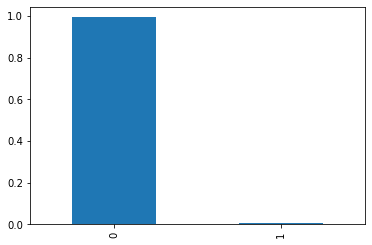

In [7]:
data['TARGET'].value_counts(normalize=True).plot(kind='bar')

In [13]:
print(X_trn.shape)
print(X_tes.shape)

(95628, 92)
(23907, 92)


### Oversampling Using SMOTE NC

In [2]:
from imblearn.over_sampling import SMOTENC
smotenc=SMOTENC(categorical_features=[42,43,44,63,64,65,66,67],random_state=1000)
X_trn_over, y_trn_over = smotenc.fit_resample(X_trn,y_trn)

In [18]:
X_trn_over.shape

(189938, 92)

In [15]:
y_trn_over.value_counts()

0    94969
1    94969
Name: TARGET, dtype: int64

<AxesSubplot:>

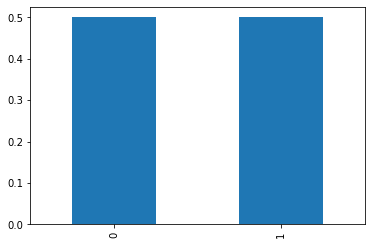

In [16]:
y_trn_over.value_counts(normalize=True).plot(kind='bar')

### Dummy coding for the nominal dataset

In [3]:
nominal_col=X_trn_over.columns[[42,43,44,63,64,65,66,67]]
X_trn_over_dummy = pd.get_dummies(X_trn_over,columns=nominal_col)
X_tes_dummy=pd.get_dummies(X_tes,columns=nominal_col)

In [21]:
print(X_trn_over.shape[1])
print(X_trn_over_dummy.shape[1])

92
100


In [22]:
print(X_tes.shape[1])
print(X_tes_dummy.shape[1])

92
100


In [4]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score

def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))

In [26]:
X_trn_over_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189938 entries, 0 to 189937
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   J_F1_LON_RK_3M_CNT_RE         156958 non-null  category
 1   J_F1_OTHER_LON_6M_AVBL_AM_RE  177742 non-null  category
 2   J_F1_OTHER_LON_MAX_3M_AM_RE   168528 non-null  category
 3   J_SHINBO_GIBO_AM_RE           172204 non-null  category
 4   J_TOT_LON_CNT_RE              174746 non-null  category
 5   J_TOT_LON_AGG_AM_RE           176704 non-null  category
 6   J_TOT_LON_MAX_AM_RE           174007 non-null  category
 7   J_DPS_CT_BAL_AM_RE            163305 non-null  category
 8   J_TOT_DPS_1M_AVBL_AM_RE       168716 non-null  category
 9   J_TOT_DPS_6M_AVBL_AM_RE       169518 non-null  category
 10  J_CORE_DPS_1M_AVBL_AM_RE      165330 non-null  category
 11  J_CORE_DPS_6M_AVBL_AM_RE      170702 non-null  category
 12  J_TOT_DPS_ACC_CNT_RE         

### Logistic Regression 

In [5]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver='liblinear',max_iter = 1000)
clf.fit(X_trn_over_dummy,y_trn_over)
pred=clf.predict(X_tes_dummy)
get_eval(y_tes,pred)

confusion matrix
[[23751     0]
 [  156     0]]
accuracy : 0.9935 , precision : 0.0000 , recall : 0.0000, F1 score : 0.0000 
 precision(0) : 0.9935 , recall(0) : 1.0000, f1(0) : 0.9967


C:\Users\vmffl\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [6]:
from sklearn.naive_bayes import CategoricalNB
catNB=CategoricalNB(fit_prior=False)
catNB.fit(X_trn_over_dummy,y_trn_over)
pred2=catNB.predict(X_tes_dummy)
get_eval(y_tes,pred2)

confusion matrix
[[22708  1043]
 [  123    33]]
accuracy : 0.9512 , precision : 0.0307 , recall : 0.2115, F1 score : 0.0536 
 precision(0) : 0.9946 , recall(0) : 0.9561, f1(0) : 0.9750


### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree=DecisionTreeClassifier(random_state=1000)
tree.fit(X_trn_dummy,y_trn)
pred3=tree.predict(X_tes_dummy)
get_eval(y_tes,pred3)

confusion matrix
[[23668    83]
 [   60    96]]
accuracy : 0.9940 , precision : 0.5363 , recall : 0.6154, F1 score : 0.5731 
 precision(0) : 0.9975 , recall(0) : 0.9965, f1(0) : 0.9970


### Grid Search

In [69]:
dt=DecisionTreeClassifier(random_state=1000)
parm_dict={"criterion":['gini','entropy'],'max_depth':[15,16,17,18,19,20,21,22,23],'min_samples_split':range(0,5)}
grid=GridSearchCV(dt,param_grid=parm_dict,cv=10,n_jobs=-1)
grid.fit(X_trn_dummy,y_trn)
grid.best_params_

C:\Users\vmffl\python\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.99305642 0.99307735 0.99295186        nan
        nan 0.99319237 0.99327603 0.99303552        nan        nan
 0.99324466 0.99333878 0.99282637        nan        nan 0.99298323
 0.99312963 0.99295186        nan        nan 0.9930878  0.99311917
 0.99275316        nan        nan 0.99327602 0.99320284 0.99294139
        nan        nan 0.99322374 0.99317146 0.9929414         nan
        nan 0.99327603 0.99309826 0.99287865        nan        nan
 0.9933074  0.99315054 0.99283682        nan        nan 0.99380934
 0.99366295 0.99370477        nan        nan 0.9936734  0.99386164
 0.99370477        nan        nan 0.99353746 0.99362111 0.99369431
        nan        nan 0.9936734  0.99372569 0.9937257         nan
        nan 0.99381981 0.99375706 0.99381981        nan        nan
 0.99375706 0.99376752 0.99378843        nan        nan 

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 3}

In [70]:
pred3=grid.best_estimator_.predict(X_tes_dummy)
get_eval(y_tes,pred3)

confusion matrix
[[23677    74]
 [   70    86]]
accuracy : 0.9940 , precision : 0.5375 , recall : 0.5513, F1 score : 0.5443 
 precision(0) : 0.9971 , recall(0) : 0.9969, f1(0) : 0.9970


### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

rdf_clf=RandomForestClassifier(random_state=1000)
rdf_clf.fit(X_trn_over_dummy,y_trn_over)
pred4=rdf_clf.predict(X_tes_dummy)
get_eval(y_tes,pred4)

confusion matrix
[[23738    13]
 [   79    77]]
accuracy : 0.9962 , precision : 0.8556 , recall : 0.4936, F1 score : 0.6260 
 precision(0) : 0.9967 , recall(0) : 0.9995, f1(0) : 0.9981


### KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_trn_over_dummy,y_trn_over)
pred5=knn_clf.predict(X_tes_dummy)
get_eval(y_tes,pred5)

confusion matrix
[[23722    29]
 [   73    83]]
accuracy : 0.9957 , precision : 0.7411 , recall : 0.5321, F1 score : 0.6194 
 precision(0) : 0.9969 , recall(0) : 0.9988, f1(0) : 0.9979


In [18]:
X_trn_dummy= pd.get_dummies(X_trn,columns=nominal_col)

### XG Boost

In [19]:
import xgboost as xgb
from xgboost import plot_importance

dtrain=xgb.DMatrix(data=X_trn_dummy.values, label=y_trn)
dtest=xgb.DMatrix(data=X_tes_dummy.values, label = y_tes)

In [20]:
params={'max_depth':6,'eta':0.1,'objective':'binary:logistic','eval_metric':'logloss','early_stopping':100}
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=600,early_stopping_rounds=100,evals=wlist)

[16:28:08] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60061	eval-logloss:0.60051
[1]	train-logloss:0.52456	eval-logloss:0.52470
[2]	train-logloss:0.46130	eval-logloss:0.46144
[3]	train-logloss:0.40788	eval-logloss:0.40807
[4]	train-logloss:0.36224	eval-logloss:0.36251
[5]	train-logloss:0.32310	eval-logloss:0.32329
[6]	train-logloss:0.28904	eval-logloss:0.28935
[7]	train-logloss:0.25948	eval-logloss:0.25976
[8]	train-logloss:0.23360	eval-logloss:0.23389
[9]	train-logloss:0.21088	eval-logloss:0.21113
[10]	train-logloss:0.19079	eval-logloss:0.19112
[11]	train-logloss:0.17310	eval-logloss:0.17339
[12]	train-logloss:0.15740	eval-logloss:0.15766
[13]	train-logloss:0.14347	eval-logloss:0.14377
[14]

[163]	train-logloss:0.01029	eval-logloss:0.01633
[164]	train-logloss:0.01026	eval-logloss:0.01629
[165]	train-logloss:0.01022	eval-logloss:0.01626
[166]	train-logloss:0.01017	eval-logloss:0.01622
[167]	train-logloss:0.01007	eval-logloss:0.01613
[168]	train-logloss:0.01001	eval-logloss:0.01608
[169]	train-logloss:0.00995	eval-logloss:0.01604
[170]	train-logloss:0.00989	eval-logloss:0.01599
[171]	train-logloss:0.00985	eval-logloss:0.01596
[172]	train-logloss:0.00976	eval-logloss:0.01590
[173]	train-logloss:0.00972	eval-logloss:0.01588
[174]	train-logloss:0.00965	eval-logloss:0.01582
[175]	train-logloss:0.00958	eval-logloss:0.01576
[176]	train-logloss:0.00954	eval-logloss:0.01575
[177]	train-logloss:0.00949	eval-logloss:0.01573
[178]	train-logloss:0.00945	eval-logloss:0.01572
[179]	train-logloss:0.00940	eval-logloss:0.01569
[180]	train-logloss:0.00933	eval-logloss:0.01565
[181]	train-logloss:0.00924	eval-logloss:0.01558
[182]	train-logloss:0.00920	eval-logloss:0.01555
[183]	train-logloss:

[331]	train-logloss:0.00398	eval-logloss:0.01170
[332]	train-logloss:0.00397	eval-logloss:0.01169
[333]	train-logloss:0.00396	eval-logloss:0.01169
[334]	train-logloss:0.00394	eval-logloss:0.01166
[335]	train-logloss:0.00393	eval-logloss:0.01165
[336]	train-logloss:0.00392	eval-logloss:0.01164
[337]	train-logloss:0.00390	eval-logloss:0.01161
[338]	train-logloss:0.00389	eval-logloss:0.01159
[339]	train-logloss:0.00388	eval-logloss:0.01159
[340]	train-logloss:0.00386	eval-logloss:0.01158
[341]	train-logloss:0.00385	eval-logloss:0.01156
[342]	train-logloss:0.00384	eval-logloss:0.01155
[343]	train-logloss:0.00381	eval-logloss:0.01153
[344]	train-logloss:0.00380	eval-logloss:0.01153
[345]	train-logloss:0.00379	eval-logloss:0.01153
[346]	train-logloss:0.00377	eval-logloss:0.01151
[347]	train-logloss:0.00375	eval-logloss:0.01151
[348]	train-logloss:0.00373	eval-logloss:0.01150
[349]	train-logloss:0.00371	eval-logloss:0.01148
[350]	train-logloss:0.00370	eval-logloss:0.01148
[351]	train-logloss:

[499]	train-logloss:0.00228	eval-logloss:0.01064
[500]	train-logloss:0.00227	eval-logloss:0.01063
[501]	train-logloss:0.00226	eval-logloss:0.01063
[502]	train-logloss:0.00226	eval-logloss:0.01063
[503]	train-logloss:0.00225	eval-logloss:0.01062
[504]	train-logloss:0.00224	eval-logloss:0.01062
[505]	train-logloss:0.00224	eval-logloss:0.01062
[506]	train-logloss:0.00223	eval-logloss:0.01061
[507]	train-logloss:0.00222	eval-logloss:0.01060
[508]	train-logloss:0.00222	eval-logloss:0.01060
[509]	train-logloss:0.00221	eval-logloss:0.01060
[510]	train-logloss:0.00221	eval-logloss:0.01060
[511]	train-logloss:0.00220	eval-logloss:0.01060
[512]	train-logloss:0.00219	eval-logloss:0.01060
[513]	train-logloss:0.00219	eval-logloss:0.01060
[514]	train-logloss:0.00218	eval-logloss:0.01061
[515]	train-logloss:0.00217	eval-logloss:0.01061
[516]	train-logloss:0.00217	eval-logloss:0.01060
[517]	train-logloss:0.00216	eval-logloss:0.01061
[518]	train-logloss:0.00215	eval-logloss:0.01060
[519]	train-logloss:

In [21]:
pred_probs=xgb_model.predict(dtest)
pred6=[1 if x>0.5 else 0 for x in pred_probs]
get_eval(y_tes,pred6)

confusion matrix
[[23739    12]
 [   62    94]]
accuracy : 0.9969 , precision : 0.8868 , recall : 0.6026, F1 score : 0.7176 
 precision(0) : 0.9974 , recall(0) : 0.9995, f1(0) : 0.9984


### Model Comparison

In [28]:
def get_eval_list(y_test,pred_value):
    pred_list=[]
    pred_list.append(np.round(accuracy_score(y_test,pred_value),4))
    pred_list.append(np.round(precision_score(y_test,pred_value),4))
    pred_list.append(np.round(recall_score(y_test,pred_value),4))
    pred_list.append(np.round(f1_score(y_test,pred_value),4))
    return pred_list

In [71]:
logistic=get_eval_list(y_tes,pred)
nb=get_eval_list(y_tes,pred2)
knn=get_eval_list(y_tes,pred5)
rf=get_eval_list(y_tes,pred4)
xg=get_eval_list(y_tes,pred6)
tree=get_eval_list(y_tes,pred3)
print(logistic,'\n',nb,'\n',knn,'\n',rf,'\n',xg,'\n',tree)

[0.9935, 0.0, 0.0, 0.0] 
 [0.9512, 0.0307, 0.2115, 0.0536] 
 [0.9957, 0.7411, 0.5321, 0.6194] 
 [0.9962, 0.8556, 0.4936, 0.626] 
 [0.9969, 0.8868, 0.6026, 0.7176] 
 [0.994, 0.5375, 0.5513, 0.5443]


C:\Users\vmffl\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
eval_matrix=pd.DataFrame(columns=['Logistic','NB','KNN','DT','RF','XG'],index=['Accuracy','Precision(1)','Recall(1)','F1_Score(1)'])
eval_matrix['Logistic']=logistic
eval_matrix['NB']=nb
eval_matrix['KNN']=knn
eval_matrix['RF']=rf
eval_matrix['XG']=xg
eval_matrix['DT']=tree
eval_matrix

,Logistic,NB,KNN,DT,RF,XG
Accuracy,0.9935,0.9512,0.9957,0.9940,0.9962,0.9969
Precision(1),0.0000,0.0307,0.7411,0.5375,0.8556,0.8868
Recall(1),0.0000,0.2115,0.5321,0.5513,0.4936,0.6026
F1_Score(1),0.0000,0.0536,0.6194,0.5443,0.6260,0.7176


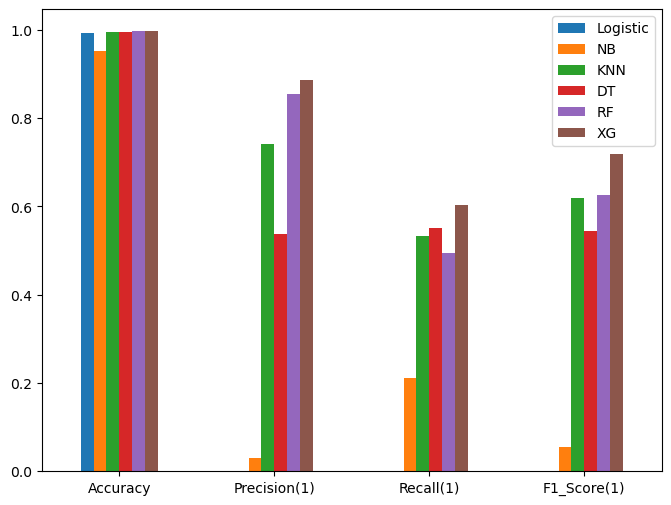

In [73]:
eval_matrix.plot(kind='bar',figsize=(8,6),rot=0)
plt.show()

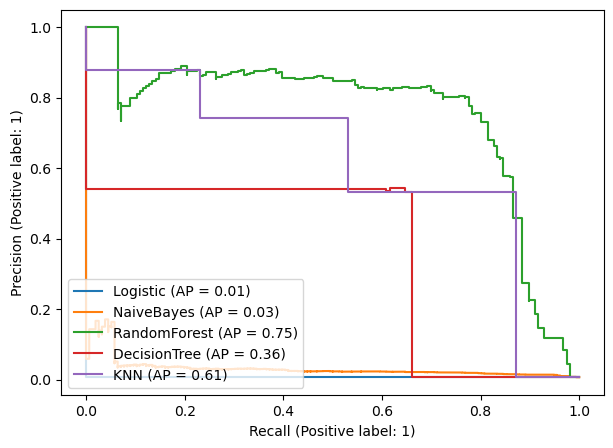

In [77]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plot_precision_recall_curve(clf, X_tes_dummy, y_tes, ax = plt.gca(), name = "Logistic")
plot_precision_recall_curve(catNB, X_tes_dummy, y_tes,ax = plt.gca(),name = "NaiveBayes")
plot_precision_recall_curve(rdf_clf, X_tes_dummy, y_tes,ax = plt.gca(),name = "RandomForest")
plot_precision_recall_curve(tree, X_tes_dummy, y_tes,ax = plt.gca(),name = "DecisionTree")
plot_precision_recall_curve(knn_clf, X_tes_dummy, y_tes,ax = plt.gca(),name = "KNN")
plt.show()